In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import ipywidgets as widgets
from IPython.display import display

# 1. Time independent parameters

Here is the payoff matrix provided in the paper:



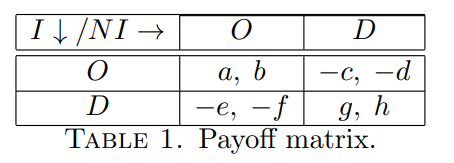

With the corresponding system of ODEs:

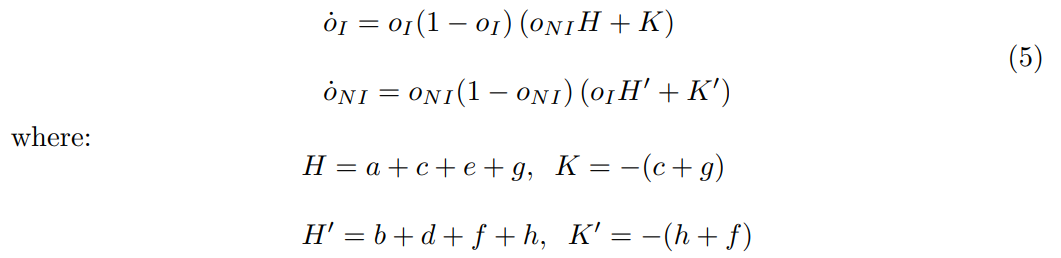


We start by plotting the vector field of the system of ODEs with all parameters equal to 1

In [2]:
# SETTING PAYOFF MATRIX VALS (P.16):
a=1
b=1
c=1
d=1
e=1
f=1
g=1
h=1

# SETTING CONSTANTS (P.19):
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f


In [3]:
# SETTING RATIOS:
nr_OI=10
nr_DI=10

nr_ONI=10
nr_DNI=10

nr_I = nr_OI + nr_DI
nr_NI = nr_ONI + nr_DNI

pop_tot = nr_I + nr_NI

# SETTING DISTRIBUTIONS (P.16):
o_i= nr_OI/ nr_I
d_i= nr_DI/ nr_I
o_ni= nr_ONI/nr_NI
d_ni= nr_DNI/nr_NI

# SETTING EXPECTATIONS (P.17):
exp_o_i = a*o_ni - c*(1-o_ni)
exp_d_i = -e*o_ni + g*(1-o_ni)
exp_o_ni = b*o_i - f*(1-o_i)
exp_d_ni = -d*o_i + h*(1-o_i)

In [2]:
# SETTING SYSTEM EQUATIONS (P.19):
def f_rumor(x,y):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))

Text(0.5, 1.0, 'Vector field for rumor spreading')

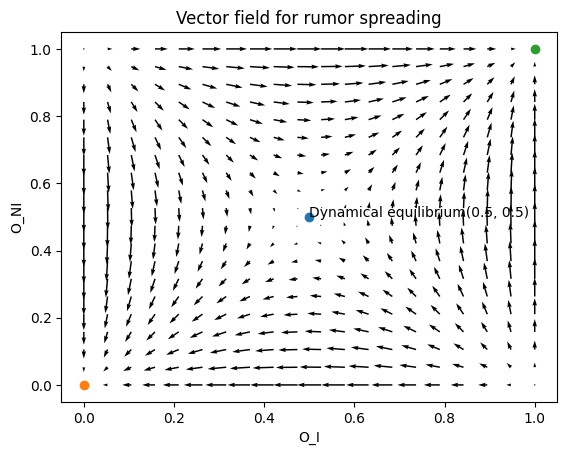

In [5]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)

X, Y = np.meshgrid(x, y)
U, V = f_rumor(X,Y)

plt.quiver(X, Y, U, V)

plt.plot(-K2/H2,-K1/H1, 'o')
plt.plot(0,0, 'o')
plt.plot(1,1, 'o')
plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

plt.xlabel('O_I')
plt.ylabel('O_NI')
plt.title("Vector field for rumor spreading")

We consider the first integral 

$$
  C(x,y) :=(-K2-H2)\ln(1-X) + K2\ln(X) + (K1+H1)\ln(1-Y) - K1\ln(Y)
  $$
  
 which is locally constant on any solution of (5).

C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\2801830305.py:16: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\2801830305.py:16: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\2801830305.py:16: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)


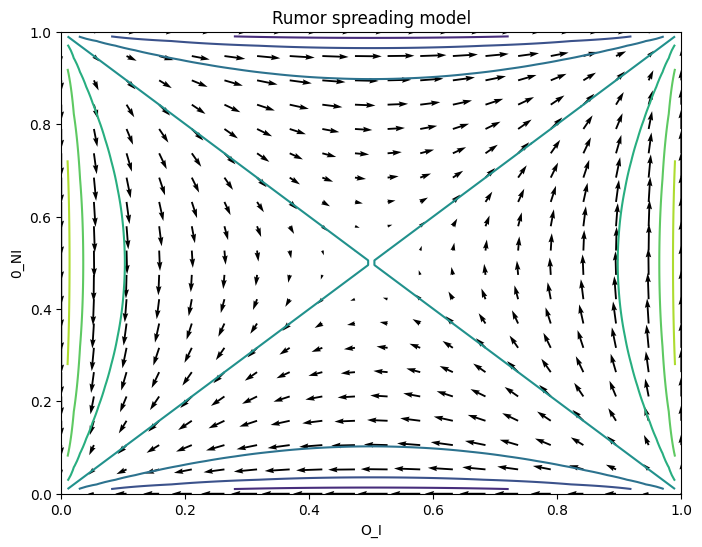

In [6]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x2=np.linspace(0, 1, 20)
y2=np.linspace(0, 1, 20)

X2, Y2 = np.meshgrid(x2, y2)
X, Y = np.meshgrid(x, y)
U, V = f_rumor(X2,Y2)



plt.figure(figsize = (8, 6))


plt.quiver(X2, Y2, U, V)
C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
plt.contour(X, Y, C)


plt.xlabel('O_I')
plt.ylabel('0_NI')
plt.title("Rumor spreading model")
plt.show()

## Testing different parameter values

In [9]:
#parameters

a=1
b=1
c=1
d=1
e=1
f=1
g=8
h=1

H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f

C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\1561721911.py:12: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\1561721911.py:12: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
C:\Users\Manon\AppData\Local\Temp\ipykernel_22356\1561721911.py:12: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)


Text(0.5, 1.0, 'Rumor spreading model')

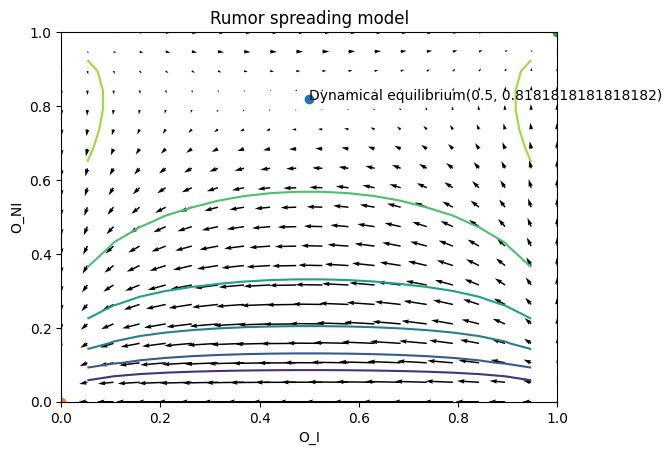

In [10]:
x_test = np.linspace(0, 1, 20)
y_test = np.linspace(0, 1, 20)
x_test2=np.linspace(0, 1, 20)
y_test2=np.linspace(0, 1, 20)

X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)


plt.quiver(X_test, Y_test, U_test, V_test)
C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
plt.contour(X_test, Y_test, C)

plt.plot(-K2/H2,-K1/H1, 'o')
plt.plot(0,0, 'o')
plt.plot(1,1, 'o')
plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

plt.xlabel('O_I')
plt.ylabel('O_NI')
plt.title("Rumor spreading model")




Output()

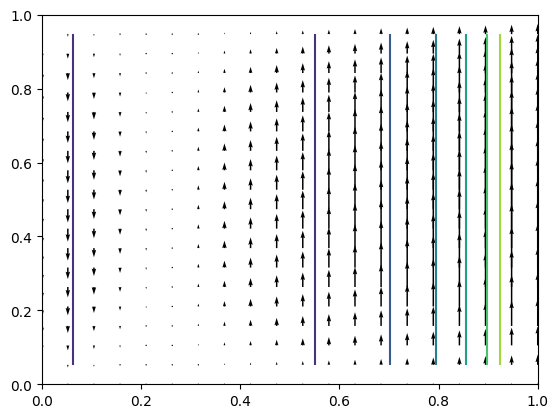

In [14]:
#Interactive vector field

a=2
b=4
c=1
d=2
e=1
f=1
g=-1
h=1

def f_rumor_parameter(x,y,H1,K1,H2,K2):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))


def update_vector_field(a, b, c, d, e, f, g, h):
    plt.clf()

    dt = 0.001; max_time = 20

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor_parameter(X_test,Y_test,H1,K1,H2,K2)


    plt.quiver(X_test, Y_test, U_test, V_test)
    C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
    plt.contour(X_test, Y_test, C)

    plt.plot(-K2/H2,-K1/H1, 'o')
    plt.plot(0,0, 'o')
    plt.plot(1,1, 'o')
    plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

    plt.xlabel('O_I')
    plt.ylabel('O_NI')
    plt.title("Rumor spreading model")

    plt.show()


# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a')
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b')
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c')
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d')
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e')
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f')
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g')
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h')


# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_vector_field, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h
})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(interactive_plot)

We can then plot the evolution of the proportions $O_{I}$ and $O_{NI}$ over the time.

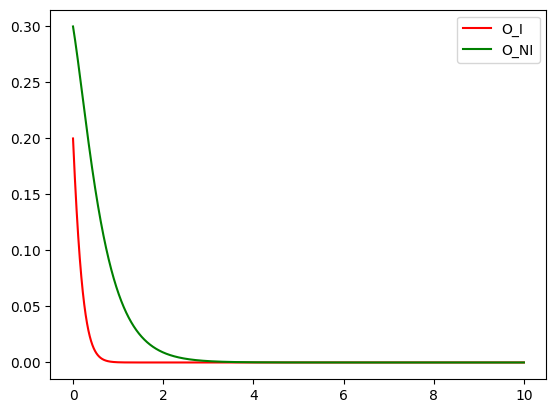

In [15]:
dt = 0.001; max_time = 10

# initial time and proportions
t = 0; x = 0.2 ; y = 0.3

# empty lists in which to store time and proportions
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1 + K1)*dt
    y = y + y*(1-y)*(x*H2 + K2)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
#p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)

plt.plot(t_list, x_list, "r", label="O_I")
plt.plot(t_list, y_list, 'g', label="O_NI")
plt.legend(loc="upper right")
plt.show()

In [40]:
#Interactive plot

x_init = 0.9
y_init = 0.8
max_time = 20

a=1
b=-2
c=1
d=3
e=-8
f=1
g=-3
h=1

def update_plot(a, b, c, d, e, f, g, h, x_init, y_init, max_time):
    plt.clf()

    dt = 0.001

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f

    t = 0
    x = x_init
    y = y_init

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1 + K1) * dt
        y = y + y * (1 - y) * (x * H2 + K2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    

    plt.plot(t_list, np.ones(np.shape(x_list)) - x_list, "r", label="O_I")
    plt.plot(t_list, np.ones(np.shape(y_list)) - y_list, 'g', label="O_NI")
    #plt.plot(t_list, x_list, "r", label="O_I")
    #plt.plot(t_list, y_list, 'g', label="O_NI")
    plt.legend(loc="upper right")
    plt.show()

# Create sliders for the parameters

slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a')
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b')
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c')
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d')
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e')
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f')
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g')
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h')

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='x_init')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='y_init')

slider_max_time = widgets.FloatSlider(value=max_time, min=0, max=50, step=1, layout=widgets.Layout(width='500px'), description='max_time')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h,
    'x_init': slider_x_init ,
    'y_init': slider_y_init,
    'max_time': slider_max_time

})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(widgets.HBox([slider_max_time]))
display(interactive_plot)

Output()

### How parameters affect the vector field?


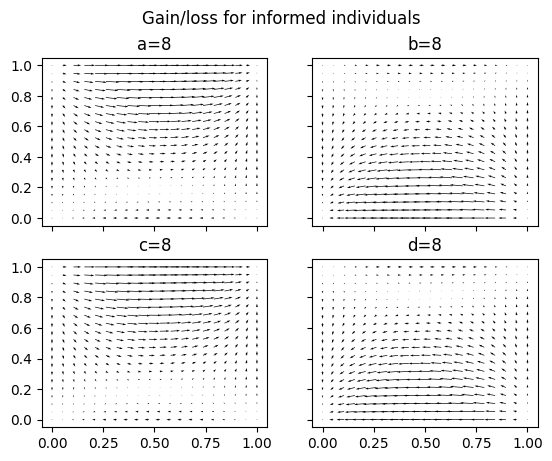

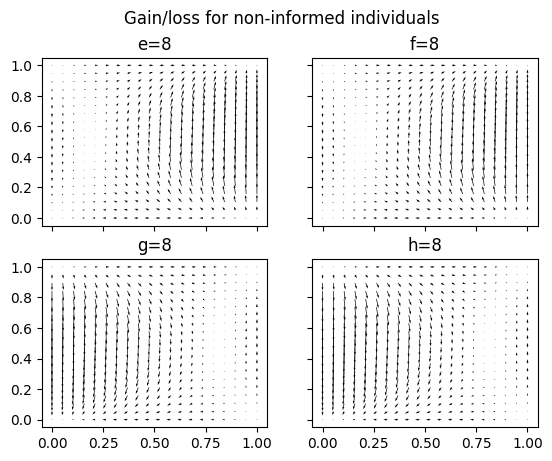

In [17]:
a=8
b=1
c=1
d=1
e=1
f=1
g=1
h=1

H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f




x_test = np.linspace(0, 1, 20)
y_test = np.linspace(0, 1, 20)
x_test2=np.linspace(0, 1, 20)
y_test2=np.linspace(0, 1, 20)

X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)


#plt.quiver(X_test, Y_test, U_test, V_test)
#C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
#plt.contour(X, Y, C)




fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Gain/loss for informed individuals')
ax1.quiver(X_test, Y_test, U_test, V_test)
ax1.set_title('a=8')

a=1
c=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax2.quiver(X_test, Y_test, U_test, V_test)
ax2.set_title('b=8')

c=1
e=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax3.quiver(X_test, Y_test, U_test, V_test)
ax3.set_title('c=8')


e=1
g=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax4.quiver(X_test, Y_test, U_test, V_test)
ax4.set_title('d=8')

for ax in fig.get_axes():
    ax.label_outer()
    

    


fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2)
fig.suptitle('Gain/loss for non-informed individuals')
g=1
b=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax5.quiver(X_test, Y_test, U_test, V_test)
ax5.set_title('e=8')

b=1
d=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax6.quiver(X_test, Y_test, U_test, V_test)
ax6.set_title('f=8')

d=1
f=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax7.quiver(X_test, Y_test, U_test, V_test)
ax7.set_title('g=8')


f=1
h=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax8.quiver(X_test, Y_test, U_test, V_test)
ax8.set_title('h=8')

for ax in fig.get_axes():
    ax.label_outer()
    
    


# 2. Time dependent simulations

First, let us try the case where the parameters are constant until a certain time point at which the model changes.


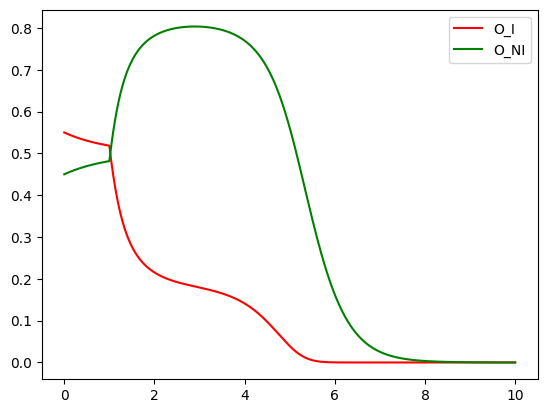

In [18]:
# model parameters

a_1=1
b_1=1
c_1=1
d_1=1
e_1=1
f_1=1
g_1=1
h_1=1

H1_1= a_1+c_1+e_1+g_1
H2_1= b_1+d_1+f_1+h_1
K1_1= -c_1-g_1
K2_1= -h_1-f_1

#new parameters after a certain time point

a_2=1
b_2=1
c_2=8
d_2=8
e_2=1
f_2=1
g_2=1
h_2=1

H1_2= a_2+c_2+e_2+g_2
H2_2= b_2+d_2+f_2+h_2
K1_2= -c_2-g_2
K2_2= -h_2-f_2


dt = 0.001; max_time = 10
time_point = 1

# initial time and proportions
t = 0; x = 0.55 ; y = 0.45

# empty lists in which to store time and proportions
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)




while t < time_point:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1_1 + K1_1)*dt
    y = y + y*(1-y)*(x*H2_1 + K2_1)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)



while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1_2 + K1_2)*dt
    y = y + y*(1-y)*(x*H2_2 + K2_2)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results
plt.plot(t_list, x_list, "r", label="O_I")
plt.plot(t_list, y_list, 'g', label="O_NI")
plt.legend(loc="upper right")
plt.show()

In [19]:
#Interactive plot: we can play with the parameters before and after a certain time point

#initial values
x_init = 0.55
y_init = 0.45
max_time = 10
time_point = 1

def update_plot_time_point(a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1, a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2, x_init, y_init, max_time, time_point):
    plt.clf()

    H1_1 = a_1 + c_1 + e_1 + g_1
    H2_1 = b_1 + d_1 + f_1 + h_1
    K1_1 = -c_1 - g_1
    K2_1 = -h_1 - f_1

    H1_2 = a_2 + c_2 + e_2 + g_2
    H2_2 = b_2 + d_2 + f_2 + h_2
    K1_2 = -c_2 - g_2
    K2_2 = -h_2 - f_2

    # initial time and proportions
    t = 0
    x = x_init
    y = y_init

    dt = 0.001
  

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < time_point:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_1 + K1_1) * dt
        y = y + y * (1 - y) * (x * H2_1 + K2_1) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_2 + K1_2) * dt
        y = y + y * (1 - y) * (x * H2_2 + K2_2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    plt.plot(t_list, x_list, "r", label="O_I")
    plt.plot(t_list, y_list, 'g', label="O_NI")
    plt.legend(loc="upper right")
    plt.show()

# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a_1')
slider_b = widgets.FloatSlider(value=b_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b_1')
slider_c = widgets.FloatSlider(value=c_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c_1')
slider_d = widgets.FloatSlider(value=d_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d_1')
slider_e = widgets.FloatSlider(value=e_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e_1')
slider_f = widgets.FloatSlider(value=f_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f_1')
slider_g = widgets.FloatSlider(value=g_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g_1')
slider_h = widgets.FloatSlider(value=h_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h_1')

slider_a2 = widgets.FloatSlider(value=a_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a_2')
slider_b2 = widgets.FloatSlider(value=b_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b_2')
slider_c2 = widgets.FloatSlider(value=c_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c_2')
slider_d2 = widgets.FloatSlider(value=d_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d_2')
slider_e2 = widgets.FloatSlider(value=e_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e_2')
slider_f2 = widgets.FloatSlider(value=f_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f_2')
slider_g2 = widgets.FloatSlider(value=g_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g_2')
slider_h2 = widgets.FloatSlider(value=h_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h_2')

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='x_init')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='y_init')

slider_max_time = widgets.FloatSlider(value=max_time, min=0, max=50, step=1, layout=widgets.Layout(width='500px'), description='max_time')
slider_time_point = widgets.FloatSlider(value=time_point, min=0, max=50, step=1, layout=widgets.Layout(width='500px'), description='time_point')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot_time_point, {
    'a_1': slider_a,
    'b_1': slider_b,
    'c_1': slider_c,
    'd_1': slider_d,
    'e_1': slider_e,
    'f_1': slider_f,
    'g_1': slider_g,
    'h_1': slider_h,

    'a_2': slider_a2,
    'b_2': slider_b2,
    'c_2': slider_c2,
    'd_2': slider_d2,
    'e_2': slider_e2,
    'f_2': slider_f2,
    'g_2': slider_g2,
    'h_2': slider_h2,

    'x_init': slider_x_init, 
    'y_init': slider_y_init,

    'max_time': slider_max_time, 
    'time_point': slider_time_point
})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(widgets.HBox([slider_a2, slider_b2, slider_c2, slider_d2]))
display(widgets.HBox([slider_e2, slider_f2, slider_g2, slider_h2]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(widgets.HBox([slider_max_time, slider_time_point]))
display(interactive_plot)

Output()

In [28]:
#Distributions - IDEAS FOR LATER
def normal(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * x**2))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))



#plt.plot(x, normal(x), linewidth=2, color='r')
#plt.show()

### ANALYSIS BASED ON VICTOR'S WORK

Performing a brief analysis on how to modify the parameters so they yeild interesting behaviour:
So far, we have seen what happens for positive parameters. Now we can analyze how the model behaves if we consider negative parameters.

the result under the radical 
$\lambda = \pm \sqrt{\frac{K_{2}K_{1}}{H_{1}H_{2}}(K_{2}+H_{2})(K_{1}+H_{1})}$ 
can then be positive or negative. 
If we substitute varibales $K_{1}$, $H_{1}$, $K_{2}$, and $H_{2}$ for their definition we get:
\begin{equation}
\begin{split}
\lambda &= \sqrt{\frac{[-(h+f)][-(c+g)]}{(a+c+e+g)(b+d+f+h)}[[-(h+f)]+(b+d+f+h)][[-(c+g)]+(a+c+e+g)]}\\\\
         &= \sqrt{\frac{(h+f)(g+c)(a+e)(b+d)}{(a+c+e+g)(b+d+f+h)}}
\end{split}
\end{equation}






We write $$ A = \frac{(h+f)(g+c)(a+e)(b+d)}{(a+c+e+g)(b+d+f+h)},$$

Now recall that the dynamical equilibrum was found to be:
$$\left(\frac{(h+f)}{b+d+f+h}, \frac{(c+g)}{a+c+e+g}\right)$$

To be biologically meaningful, we need both quantities $\frac{(h+f)}{b+d+f+h}$ and $\frac{(c+g)}{a+c+e+g}$ to be in [0,1].

- **_Case 1_**:  $(h+f)>0$ and $(b+d+h+f)>0$ and $|h+f|<|b+d+h+f|$  

    i.e  (i) $(h+f)>0$ and (ii) $(h+f)> -(b+d)$ and (iii) $|h+f|<|b+d+h+f|$  

    If $(b+d)<0$, then the conditions (ii) and (iii) are incompatible.  

    If $(b+d)>0$, then (ii) and (iii) are always true.  

    In the end, we can simplify the conditions:

    (i) $(h+f)>0$ and (ii) $(b+d)>0$


- **_Case 2_**: $(h+f)<0$ and $(b+d+h+f)<0$ and $|h+f|<|b+d+h+f|$  

    i.e  (i) $(h+f)<0$ and (ii) $(h+f)< -(b+d)$ and (iii) $|h+f|<|b+d+h+f|$  

    If $(b+d)>0$, then the conditions (ii) and (iii) are incompatible.  

    If $(b+d)<0$, then (ii) and (iii) are always true.  

    In the end, we can simplify the conditions: 

    (i) $(h+f)<0$  and (ii) $(b+d)<0$


By symmetry, we obtain 2 more cases:

- **_Case 3_**: (i) $(c+g)>0$  and (ii) $(a+e)>0$

- **_Case 4_**: (i) $(c+g)<0$  and (ii) $(a+e)<0$



Now if we combine those cases we get:

1. Case 1 + Case 3: 

$$(b+d)>0, (h+f)>0, (a+e)>0 \text{  and  } (c+g)>0.$$ 

So $A>0$ and the dynamical equilibrium remains a saddle.

2. Case 1 + Case 4: 

$$(b+d)>0, (h+f)>0, (a+e)<0 \text{  and  } (c+g)<0.$$ 

So $A<0$, the model is periodic and A becomes a stable equilibrium.

3. Case 2 + Case 3: 

$$(b+d)<0, (h+f)<0, (a+e)>0 \text{  and  }  (c+g)>0.$$ 

So $A<0$, the model is periodic and A becomes a stable equilibrium.

4. Case 2 + Case 4: 

$$(b+d)<0, (h+f)<0, (a+e)<0 \text{  and  } (c+g)<0.$$ 

So $A>0$ and the dynamical equilibrium remains a saddle.



--> What does it mean in terms of game theory? Of the model is periodic, then there is no Nash equilibrium?

In [20]:
def caseSwitchForPayoff(case_number):
    # THIS FUNCTION CHANGES THE PARAMETERS SUCH THAT THEY MATCH THE SPECIFIED
    # CASE FROM THE ALGEBRAIC ANALYSIS.
    if case_number == 1:
    # FOR CASE 1 WE HAVE:  b+d>0, h+f>0, a+e>0 and c+g>0
        a=1
        b=-1
        c=1
        d=3
        e=1
        f=4
        g=1
        h=4
    elif case_number == 2:
    # FOR CASE 2 WE HAVE: b+d>0, h+f>0, a+e<0 and c+g<0
        a=1
        b=-2
        c=1
        d=3
        e=-8
        f=1
        g=-3
        h=1
    elif case_number == 3:
    # COASE 3 : b+d<0, h+f<0, a+e>0 and  c+g>0
        a=1
        b=-8
        c=8
        d=4
        e=1
        f=-1
        g=-4
        h=-1
    elif case_number == 4:
    # CASE 4 b+d<0, h+f<0, a+e<0 and c+g<0
        a=-1
        b=-6
        c=1
        d=1
        e=-1
        f=-2
        g=-4
        h=1
    return a, b, c, d, e, f, g, h

C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\371158262.py:27: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\371158262.py:27: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\371158262.py:27: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)


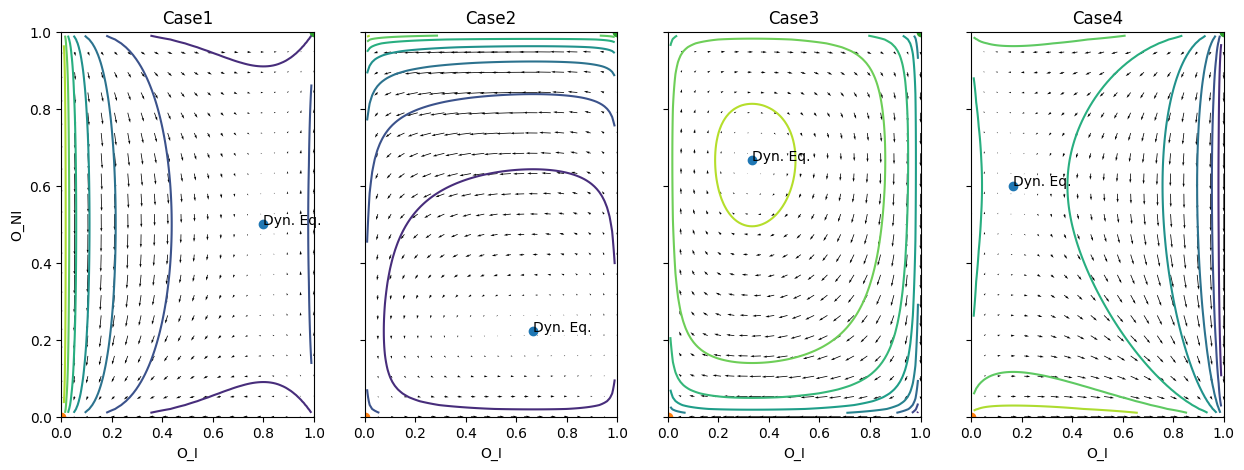

In [67]:
fig, axs = plt.subplots(1,4, figsize=(15,5))

for idx in range(4):
    a, b, c, d, e, f, g, h = caseSwitchForPayoff(idx+1) 
    H1= a+c+e+g
    H2= b+d+f+h
    K1= -c-g
    K2= -h-f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor(X_test,Y_test)

    

    axs[idx].quiver(X_test, Y_test, U_test, V_test)
    axs[idx].plot(-K2/H2,-K1/H1, 'o')
    axs[idx].plot(0,0, 'o')
    axs[idx].plot(1,1, 'o')
    axs[idx].text(-K2/H2,-K1/H1, 'Dyn. Eq.')
    C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
    axs[idx].contour(X, Y, C)
    axs[idx].set_title('Case' + str(idx+1))
    axs[idx].set(xlabel='O_I', ylabel='O_NI')
    axs[idx].label_outer()

Special cases:

When the dynamical equilibrium = (1,1) or (0,1)

In [21]:

def specialCaseSwitchForPayoff(case_number):
    # THIS FUNCTION CHANGES THE PARAMETERS SUCH THAT THEY MATCH THE SPECIFIED
    # CASE FROM THE ALGEBRAIC ANALYSIS.
    if case_number == 1:
    # FOR CASE 1 WE HAVE:  b+d>0, h+f>0, a+e>0 and c+g>0
        a=1
        b=2
        c=8
        d=-b
        e=-a
        f=10
        g=1
        h=10
    elif case_number == 2:
    # FOR CASE 2 WE HAVE: b+d>0, h+f>0, a+e<0 and c+g<0
        a=1
        b=1
        c=8
        d=3
        e=1
        f=-1
        g=-c
        h=-f
    elif case_number == 3:
    # COASE 3 : b+d<0, h+f<0, a+e>0 and  c+g>0
        a=1
        b=-8
        c=8
        d=-b
        e=-a
        f=-1
        g=-4
        h=-1
    elif case_number == 4:
    # CASE 4 b+d<0, h+f<0, a+e<0 and c+g<0
        a=-1
        b=-1
        c=-8
        d=-3
        e=-1
        f=1
        g=-c
        h=-f
    return a, b, c, d, e, f, g, h


C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\1891964745.py:27: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\1891964745.py:27: RuntimeWarning: invalid value encountered in multiply
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\1891964745.py:27: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\1891964745.py:27: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)


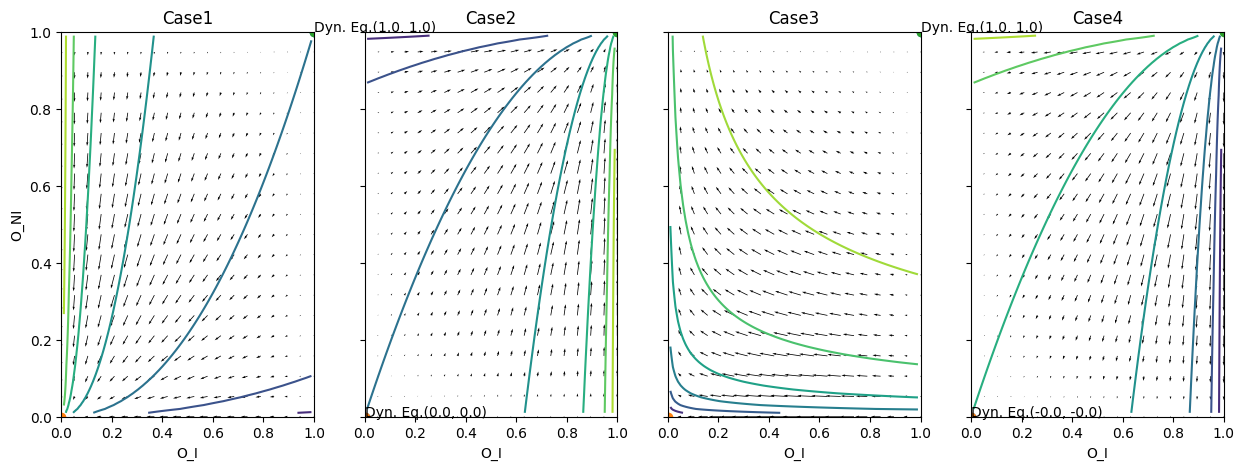

In [79]:
fig, axs = plt.subplots(1,4, figsize=(15,5))

for idx in range(4):
    a, b, c, d, e, f, g, h = specialCaseSwitchForPayoff(idx+1) 
    H1= a+c+e+g
    H2= b+d+f+h
    K1= -c-g
    K2= -h-f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor(X_test,Y_test)

    

    axs[idx].quiver(X_test, Y_test, U_test, V_test)
    axs[idx].plot(-K2/H2,-K1/H1, 'o')
    axs[idx].plot(0,0, 'o')
    axs[idx].plot(1,1, 'o')
    axs[idx].text(-K2/H2,-K1/H1, 'Dyn. Eq.' +str((-K2/H2,-K1/H1)))
    C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
    axs[idx].contour(X, Y, C)
    axs[idx].set_title('Case' + str(idx+1))
    axs[idx].set(xlabel='O_I', ylabel='O_NI')
    axs[idx].label_outer()

Interesting: we see here for case 3, the stable equilibrium is (0,1)

In [22]:
def specialCaseSwitchForPayoff2(case_number):
    # THIS FUNCTION CHANGES THE PARAMETERS SUCH THAT THEY MATCH THE SPECIFIED
    # CASE FROM THE ALGEBRAIC ANALYSIS.
    if case_number == 1:
    # FOR CASE 1 WE HAVE:  (1,0)
        a=1
        b=2
        c=8
        d=1
        e=-a
        f=10
        g=1
        h=-f
    elif case_number == 2:
    # FOR CASE 2 WE HAVE: b+d>0, h+f>0, a+e<0 and c+g<0
        a=-1
        b=-2
        c=-8
        d=-1
        e=-a
        f=-10
        g=-1
        h=-f
    elif case_number == 3:
    # COASE 3 : b+d<0, h+f<0, a+e>0 and  c+g>0
        a=1
        b=-8
        c=8
        d=-b
        e=2
        f=-1
        g=-c
        h=-1
    elif case_number == 4:
    # CASE 4 b+d<0, h+f<0, a+e<0 and c+g<0
        a=-1
        b=8
        c=-8
        d=-b
        e=-2
        f=1
        g=-c
        h=1
    return a, b, c, d, e, f, g, h

C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\2732360059.py:27: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\2732360059.py:27: RuntimeWarning: invalid value encountered in multiply
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_18408\2732360059.py:27: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)


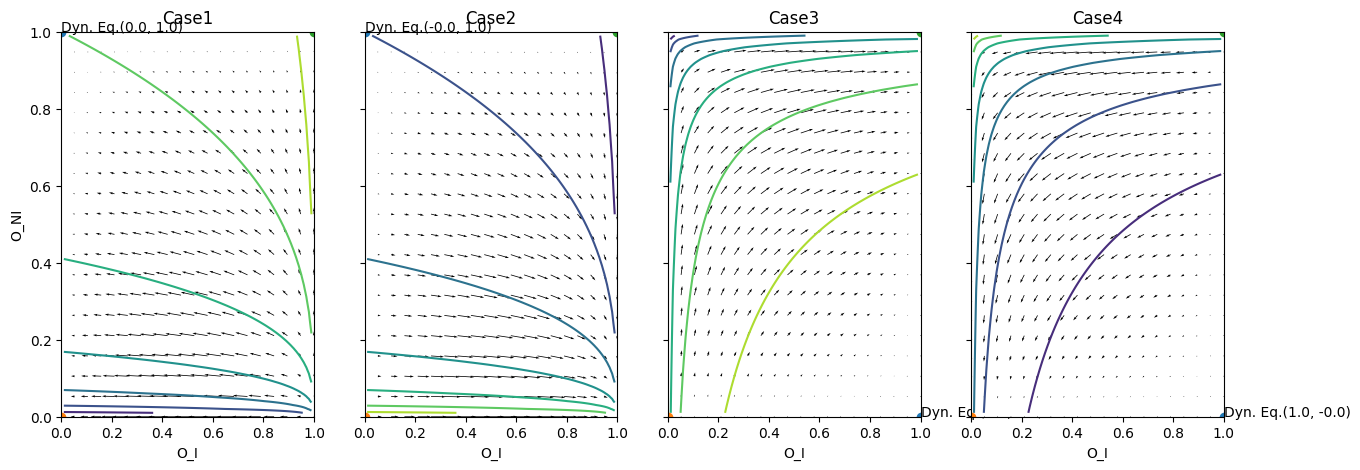

In [81]:
fig, axs = plt.subplots(1,4, figsize=(15,5))

for idx in range(4):
    a, b, c, d, e, f, g, h = specialCaseSwitchForPayoff2(idx+1) 
    H1= a+c+e+g
    H2= b+d+f+h
    K1= -c-g
    K2= -h-f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor(X_test,Y_test)

    

    axs[idx].quiver(X_test, Y_test, U_test, V_test)
    axs[idx].plot(-K2/H2,-K1/H1, 'o')
    axs[idx].plot(0,0, 'o')
    axs[idx].plot(1,1, 'o')
    axs[idx].text(-K2/H2,-K1/H1, 'Dyn. Eq.' +str((-K2/H2,-K1/H1)))
    C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
    axs[idx].contour(X, Y, C)
    axs[idx].set_title('Case' + str(idx+1))
    axs[idx].set(xlabel='O_I', ylabel='O_NI')
    axs[idx].label_outer()

# 3. Probabilistic approach

In this section we want to see the evolution of the number of individuals in each category. We recall that an informed individual is chosen at random and devide to spread the rumor in its original content or in a distorted way according to the payoff matrix. From the payoffs, we can calculate the probabilities for an individual to chose one strategy or the other. These probabilities correspond to the $O_{I}^{*}$, $O_{NI}^{*}$, $D_{I}^{*}$ and $D_{NI}^{*}$ in the paper.

First we plot the number of individuals at each iteration.

In [164]:
import random

a=1
b=-2
c=1
d=3
e=-8
f=1
g=-3
h=1

prob_oi = (h+f)/(b+d+h+f)
prob_oni = (g+c)/(a+c+e+g)
prob_di = (b+d)/(b+d+h+f)
prob_dni = (a+e)/(a+c+e+g)


initial_original_informed = 9
initial_distorted_informed = 1
initial_original_noninformed = 35
initial_distorted_noninformed = 5
population_size = initial_original_informed + initial_distorted_informed + initial_original_noninformed + initial_distorted_noninformed

nb_oi = initial_original_informed
nb_oni= initial_original_noninformed
nb_di = initial_distorted_informed
nb_dni= initial_distorted_noninformed


iterations = 30

size_fig = 200


population_informed = []
population_noninformed = []

# Add "original" vectors
for i in range(initial_original_informed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_informed):
    vector= ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "original" vectors
for i in range(initial_original_noninformed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_noninformed):
    vector= ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)



for i in range(iterations):
    indice_i = random.randint(0, nb_oi+nb_di-1)
    indice_ni = random.randint(0, nb_oni+nb_dni-1)
    if population_informed[indice_i][0] == "original":
        if random.random() < prob_oi:
            population_noninformed[indice_ni][0] == "original"
            nb_oni = nb_oni-1
        else:
            population_noninformed[indice_ni][0] == "distorted"
            nb_dni=nb_dni-1
        nb_oi+=1


    elif population_informed[indice_i][0] == "distorted":
        if random.random() < prob_di:
            population_noninformed[indice_ni][0] == "distorted"
            nb_dni=nb_dni-1
        else:
            population_noninformed[indice_ni][0] == "original"
            nb_oni = nb_oni-1
        nb_di+=1

    population_informed.append(population_noninformed[indice_ni])
    del population_noninformed[indice_ni]

    # Track the number of informed and uninformed individuals
    oi_count = np.count_nonzero(np.array(population_informed) == "original", axis=0)[0]
    di_count = np.count_nonzero(np.array(population_informed) == "distorted", axis=0)[0]
    oni_count = np.count_nonzero(np.array(population_noninformed) == "original", axis=0)[0]
    dni_count = np.count_nonzero(np.array(population_noninformed) == "distorted", axis=0)[0]


    #Print ratios
    #print(f"Iteration: {i+1}, Informed Original: {np.round(oi_count/(oi_count+di_count),3)}, Informed Distorted: {np.round(di_count/(oi_count+di_count),3)}, Non-informed Original: {np.round(oni_count/(oni_count+dni_count),3)}, Non-informed Distorted: {np.round(dni_count/(oni_count+dni_count),3)}")
    
    #Print number of iterations
    print(f"Iteration: {i+1}, Informed Original: {oi_count}, Informed Distorted: {di_count}, Non-informed Original: {oni_count}, Non-informed Distorted: {dni_count}")

    

Iteration: 1, Informed Original: 10, Informed Distorted: 1, Non-informed Original: 34, Non-informed Distorted: 5
Iteration: 2, Informed Original: 11, Informed Distorted: 1, Non-informed Original: 33, Non-informed Distorted: 5
Iteration: 3, Informed Original: 12, Informed Distorted: 1, Non-informed Original: 32, Non-informed Distorted: 5
Iteration: 4, Informed Original: 13, Informed Distorted: 1, Non-informed Original: 31, Non-informed Distorted: 5
Iteration: 5, Informed Original: 14, Informed Distorted: 1, Non-informed Original: 30, Non-informed Distorted: 5
Iteration: 6, Informed Original: 14, Informed Distorted: 2, Non-informed Original: 30, Non-informed Distorted: 4
Iteration: 7, Informed Original: 15, Informed Distorted: 2, Non-informed Original: 29, Non-informed Distorted: 4
Iteration: 8, Informed Original: 15, Informed Distorted: 3, Non-informed Original: 29, Non-informed Distorted: 3
Iteration: 9, Informed Original: 16, Informed Distorted: 3, Non-informed Original: 28, Non-infor

Now, we visualize the population with dots. 

- Green dots represent informed individuals which have more interests in spreading the original content of the rumor. 
- Purple dots represent informed individuals which have more interests in spreading the opposite content of the rumor.
- Black dots represent the non-informed individuals.

We simulate the changes at each iteration.

*For better visualization we want to try to highlight the informed individual chosen at each step and trace an arrow to the non-informed individual chosen at random.*

In [169]:
import random
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

a = 1
b = -2
c = 1
d = 3
e = -8
f = 1
g = -3
h = 1

prob_oi = (h + f) / (b + d + h + f)
prob_oni = (g + c) / (a + c + e + g)
prob_di = (b + d) / (b + d + h + f)
prob_dni = (a + e) / (a + c + e + g)


initial_original_informed = 3
initial_distorted_informed = 1
initial_original_noninformed = 22
initial_distorted_noninformed = 8
population_size = (
    initial_original_informed
    + initial_distorted_informed
    + initial_original_noninformed
    + initial_distorted_noninformed
)

iterations = initial_original_noninformed + initial_distorted_noninformed

nb_oi = initial_original_informed
nb_oni = initial_original_noninformed
nb_di = initial_distorted_informed
nb_dni = initial_distorted_noninformed

size_fig = 500

population_informed = []
population_noninformed = []

# Add "original" vectors
for i in range(initial_original_informed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_informed):
    vector = ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_informed.append(vector)

# Add "original" vectors
for i in range(initial_original_noninformed):
    vector = ["original", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)

# Add "distorted" vectors
for i in range(initial_distorted_noninformed):
    vector = ["distorted", random.randint(0, size_fig), random.randint(0, size_fig)]
    population_noninformed.append(vector)




# Create sliders for the parameters
slider_iterations = widgets.IntSlider(
    value=iterations, min=0, max=iterations, step=1, description="Iterations"
)

x0=[x[1] for x in population_informed + population_noninformed]
y0=[x[2] for x in population_informed + population_noninformed]
colors0 = [plot_colors[x[0]] for x in population_informed] + ["black"] * len(population_noninformed)
vectors=[([x0,y0,colors0])]

for i in range(iterations):
    indice_i = random.randint(0, nb_oi + nb_di - 1)
    indice_ni = random.randint(0, nb_oni + nb_dni - 1)

    if population_informed[indice_i][0] == "original":
        if random.random() < prob_oi:
            population_noninformed[indice_ni][0] = "original"
            nb_oni -= 1
        else:
            population_noninformed[indice_ni][0] = "distorted"
            nb_dni -= 1
        nb_oi += 1

    elif population_informed[indice_i][0] == "distorted":
        if random.random() < prob_di:
            population_noninformed[indice_ni][0] = "distorted"
            nb_dni -= 1
        else:
            population_noninformed[indice_ni][0] = "original"
            nb_oni -= 1
        nb_di += 1

    population_informed.append(population_noninformed[indice_ni])
    del population_noninformed[indice_ni]

    # Extract the coordinates and colors for the scatter plot
    xs = [x[1] for x in population_informed + population_noninformed]
    ys = [x[2] for x in population_informed + population_noninformed]
    colors = [plot_colors[x[0]] for x in population_informed] + ["black"] * len(population_noninformed)
    vector=[xs, ys, colors]
    vectors.append(vector)



def update_plot(iteration):


    plot_colors = {"original": "green", "distorted": "purple"}

    # Create an empty scatter plot
    fig, ax = plt.subplots(figsize=(6, 6))
    scatter = ax.scatter([], [], c="black")

    # Set plot limits
    ax.set_xlim(0, size_fig)
    ax.set_ylim(0, size_fig)

    # Set plot labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")


    scatter.set_offsets(np.column_stack([vectors[iteration][0], vectors[iteration][1]]))
    scatter.set_color(vectors[iteration][2])




    # Add arrow pointing to the chosen dot in non-informed population
    #chosen_vector = population_noninformed[iteration]
    #arrow = FancyArrow(
        #chosen_vector[1],
        #chosen_vector[2],
        #vector[1] - chosen_vector[1],
        #vector[2] - chosen_vector[2],
        #width=0.1,
        #color="black",
        #length_includes_head=True,
        #head_width=5,
    #)
    #ax.add_patch(arrow)




    ax.set_title(f"Iteration: {iteration}")
    plt.draw()


widgets.interact(update_plot, iteration=slider_iterations)


interactive(children=(IntSlider(value=30, description='Iterations', max=30), Output()), _dom_classes=('widget-…

<function __main__.update_plot(iteration)>